In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
data_path = './data/australian.dat'
df = np.genfromtxt(data_path)
df = pd.DataFrame(data = df, columns = ['A' + str(i) for i in range(1, 15)] + ['label'])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,label
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0


In [60]:
X = df.drop(columns = 'label')
y = df['label']

In [61]:
encode_rules = ColumnTransformer(
    transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [3, 4, 5, 11])],
    remainder = 'passthrough'
)

In [62]:
X = encode_rules.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [79]:
tmp = np.arange(2, 12)
val = []
val2 = []
for i in tmp:
    dt = DecisionTreeClassifier(random_state = 12, max_depth = i)
    val.append(cross_val_score(estimator = dt, X = X, y = y, cv = 5, scoring = 'accuracy').mean())
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    val2.append(accuracy_score(y_test, pred))

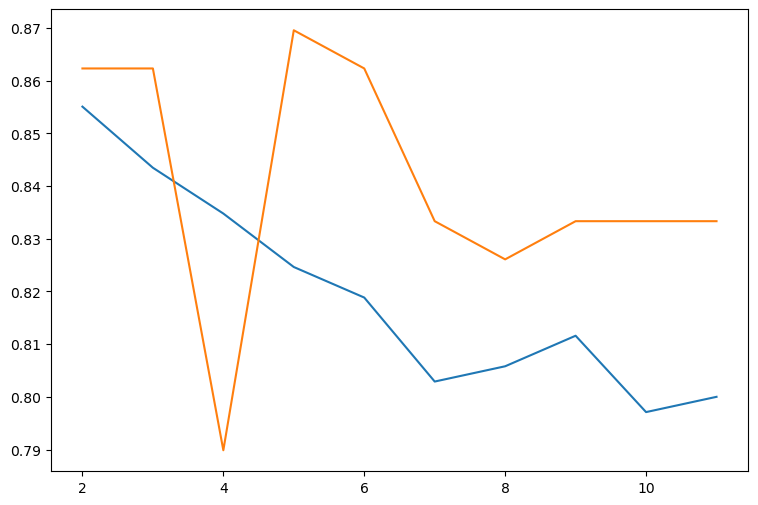

In [80]:
plt.figure(figsize = (9, 6))
plt.plot(tmp, val)
plt.plot(tmp, val2)
plt.show()

In [71]:
param = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split' : np.arange(2, 402, 20),
    'min_samples_leaf' : np.arange(1, 401, 20),
    'max_leaf_nodes': (2, 3, 4, 5, 10, 15, 20, 35, 50, 100),
    'class_weight': ['balanced', None, {0: 1, 1: 5}]
}
grid = GridSearchCV(DecisionTreeClassifier(), param, verbose = 1, n_jobs = -1)
grid_fit = grid.fit(X_train, y_train)
print(grid_fit.best_params_)

Fitting 5 folds for each of 84000 candidates, totalling 420000 fits
{'class_weight': None, 'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(102)}


In [72]:
dt_pred = grid_fit.predict(X_test)
print(accuracy_score(y_test, dt_pred))

0.8623188405797102


In [83]:
tmp = np.array([5, 10, 20, 30, 50, 75, 100, 150])
val = []
val2 = []
for i in tmp:
    dt = RandomForestClassifier(random_state = 12, n_estimators = i)
    val.append(cross_val_score(estimator = dt, X = X, y = y, cv = 5, scoring = 'accuracy').mean())
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    val2.append(accuracy_score(y_test, pred))

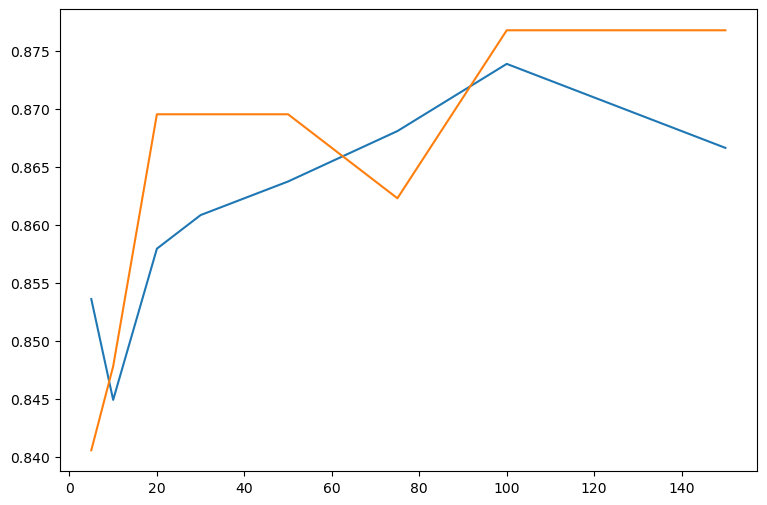

In [84]:
plt.figure(figsize = (9, 6))
plt.plot(tmp, val)
plt.plot(tmp, val2)
plt.show()